<a href="https://colab.research.google.com/github/sakarla/AI-in-the-Built-Environment/blob/main/week%204_5_Data%20Visualization/Notebook%20code/Self_Organizing_Maps_(SOM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, you will learn how to apply the clustering algorithm to the image dataset. We collected satellite images and street view images before and now we want to run Self self-organizing map which is one of the unsupervised algorithms for clustering data.

This is a pipeline of our work:

1.  **Introduction to SOMs:** Provide a brief overview of what SOMs are and how they are used in machine learning.
2. **Environment Setup:** Instructions on installing necessary libraries.
3.  **Data Loading:** How to load data from a folder.
4.  **Data Preprocessing:** Preparing image data for training.
5.  **Training the SOM:** Setting up and training the SOM on image data.
6.  **Visualization:** Visualizing the results.
7.  **Conclusion:** Summarize what was learned.

## Introduction to Self-Organizing Maps (SOMs)

Self-Organizing Maps (SOMs) are a type of unsupervised learning that help to visualize and interpret high-dimensional data in lower-dimensional (usually 2D) spaces. They are particularly useful for clustering and visualizing complex datasets like images.


## Environment Setup

Please run the below cell to install necessary libraries if they are not already installed.


In [3]:
!pip install minisom Pillow


## Loading Data

To start, we will link this notebook to your Google Drive. Make sure you are logged in on your Google account

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preprocessing

You'll need to load your images and possibly preprocess them. This typically includes resizing the images to a standard size and flattening them into a vector form since SOMs work with vector data.
change the path if you needed for your dataset:`image_paths = glob.glob('/content/drive/MyDrive/Colab Notebooks/satellite_images/*.jpg') `

In [4]:
from PIL import Image
import numpy as np
import os
import glob

def load_and_preprocess_image(path, size=(64, 64)):
    with Image.open(path) as img:
        img = img.resize(size)  # Resize image
        return np.array(img).flatten()  # Convert to a flat array
###########################################################################################
# Assuming your images are in a folder called 'downloaded_images'
image_paths = glob.glob('/content/drive/MyDrive/Colab Notebooks/satellite_images/*.jpg')
###########################################################################################
data = np.array([load_and_preprocess_image(path) for path in image_paths])


## Train the Self-Organizing Map

We will now initialize and train our SOM on the preprocessed image features.


In [5]:
from minisom import MiniSom

# SOM initialization and training
som_width = 10
som_height = 10
som = MiniSom(som_width, som_height, data.shape[1], sigma=1.0, learning_rate=0.5)

# Randomly initialize weights
som.random_weights_init(data)

# Train the SOM
num_iteration = 5000
som.train_random(data, num_iteration)  # Training with random data each time


## Visualization of SOM Results

After training the SOM, you might want to visualize the results to understand what the SOM has learned.


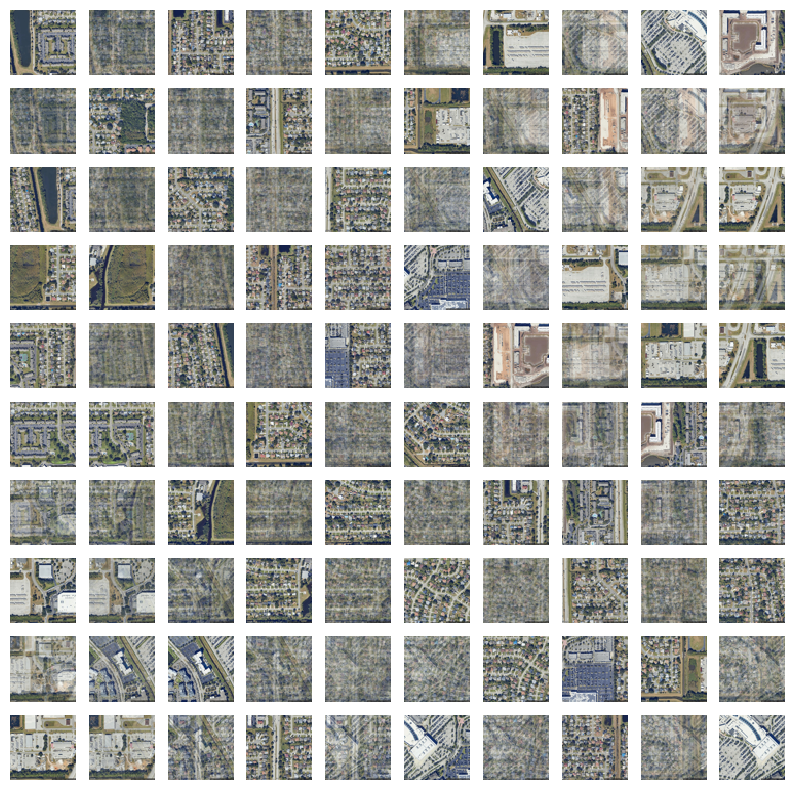

In [6]:
import matplotlib.pyplot as plt

# Function to plot SOM's weight
def plot_som_weights(som):
    plt.figure(figsize=(10, 10))
    for i in range(som_width):
        for j in range(som_height):
            weight = som.get_weights()[i, j].reshape((64, 64, 3))  # Adjust shape based on your image's channel
            plt.subplot(som_width, som_height, i * som_height + j + 1)
            plt.imshow(weight.astype(np.uint8), interpolation='none')
            plt.axis('off')
    plt.show()

plot_som_weights(som)


# **Streetview images**

Now we want to train SON on the Street View dataset and visualize it.

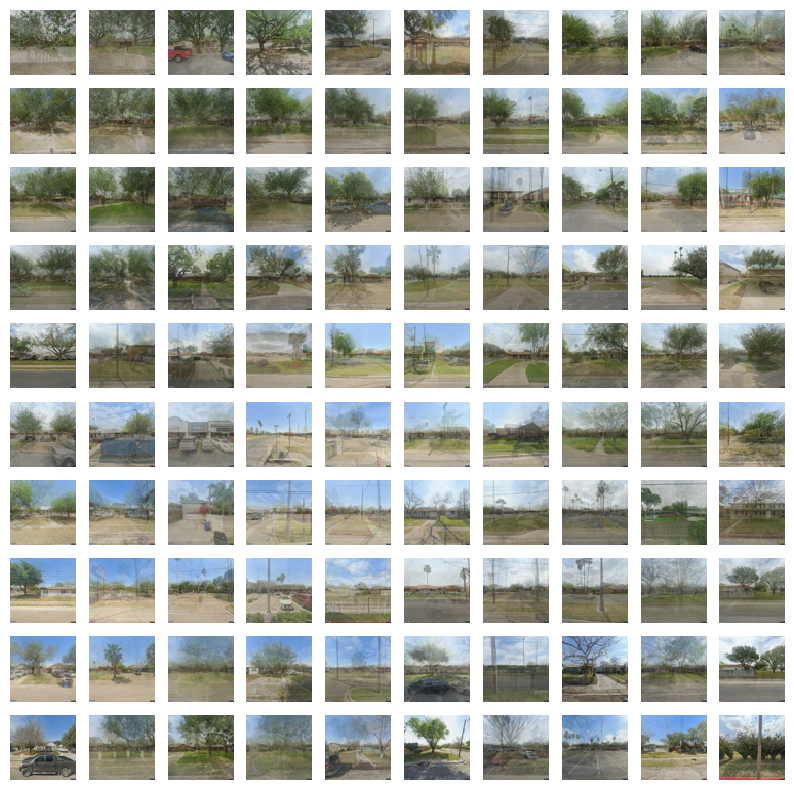

In [9]:
from minisom import MiniSom
import matplotlib.pyplot as plt

###########################################################################################
# Assuming your images are in a folder called 'downloaded_images'
image_paths = glob.glob('/content/drive/MyDrive/Colab Notebooks/streetview/*.jpg')
###########################################################################################
data = np.array([load_and_preprocess_image(path) for path in image_paths])

# SOM initialization and training
som_width = 10
som_height = 10
som = MiniSom(som_width, som_height, data.shape[1], sigma=1.0, learning_rate=0.5)

# Randomly initialize weights
som.random_weights_init(data)

# Train the SOM
num_iteration = 1000
som.train_random(data, num_iteration)  # Training with random data each time


# Function to plot SOM's weight
def plot_som_weights(som):
    plt.figure(figsize=(10, 10))
    for i in range(som_width):
        for j in range(som_height):
            weight = som.get_weights()[i, j].reshape((64, 64, 3))  # Adjust shape based on your image's channel
            plt.subplot(som_width, som_height, i * som_height + j + 1)
            plt.imshow(weight.astype(np.uint8), interpolation='none')
            plt.axis('off')
    plt.show()

plot_som_weights(som)
